# CIFAR 10 CNN Model with both Gray_Scale and RGB image support.

## Import Settings and Load Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.image as tfi
import matplotlib.pyplot as plt

In [2]:


# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize RGB images
x_train_rgb = x_train.astype("float32") / 255.0
x_test_rgb = x_test.astype("float32") / 255.0

# Grayscale version (1 channel)
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Convert TF tensors → NumPy arrays
x_train_gray = x_train_gray.numpy()
x_test_gray = x_test_gray.numpy()

print("RGB:", x_train_rgb.shape)
print("Gray:", x_train_gray.shape)

print(x_train_gray.shape, x_train_gray.dtype)


RGB: (50000, 32, 32, 3)
Gray: (50000, 32, 32, 1)
(50000, 32, 32, 1) uint8


## Support Functions

In [3]:
def plot_loss(history):
    plt.plot(history.history['loss'],label="loss")
    plt.plot(history.history['val_loss'],label="val_loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("SCC")
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label="accuracy")
    plt.plot(history.history['val_accuracy'],label="val_accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

## Models Setup

### Gray_Scale Model Setup

In [ ]:
model_gray = models.Sequential([
    # Block 1
    layers.Conv2D(16, (3, 3), activation="relu", padding="valid",
                  input_shape=(32, 32, 1)),
    layers.Conv2D(16, (3, 3), activation="relu", padding="valid"),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(32, (3, 3), activation="relu", padding="valid"),
    layers.Conv2D(1, (3, 3), activation="relu", padding="valid"),
    layers.MaxPooling2D((2, 2)),

    # Dense
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_gray.summary()


e:\Apps_and_Programs\anaconda\envs\CNN_TF_GPU\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,802 (499.23 KB)

 Trainable params: 127,802 (499.23 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model_gray.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history_gray = model_gray.fit(
    x_train_gray, y_train,
    batch_size=64,
    epochs=25,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)


Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3668 - loss: 1.8035 - val_accuracy: 0.4714 - val_loss: 1.4786
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5256 - loss: 1.3581 - val_accuracy: 0.5550 - val_loss: 1.2999
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5877 - loss: 1.1802 - val_accuracy: 0.5992 - val_loss: 1.1738
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6343 - loss: 1.0503 - val_accuracy: 0.5982 - val_loss: 1.1530
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6707 - loss: 0.9450 - val_accuracy: 0.6352 - val_loss: 1.0646
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6957 - loss: 0.8742 - val_accuracy: 0.6498 - val_loss: 1.0235
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7236 - loss: 0.7937 - val_accuracy: 0.6522 - val_loss: 1.0341
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7442 - loss: 0.7332 - val_accuracy: 0.

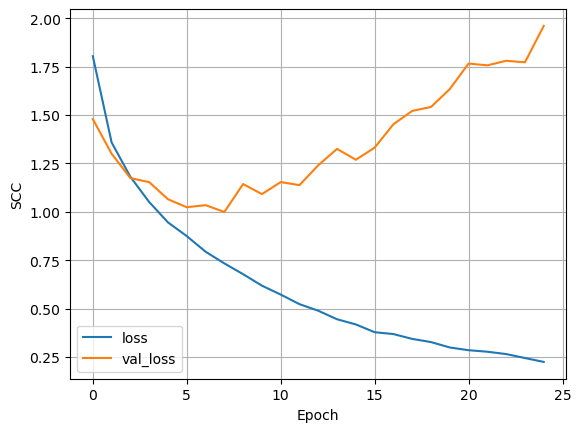

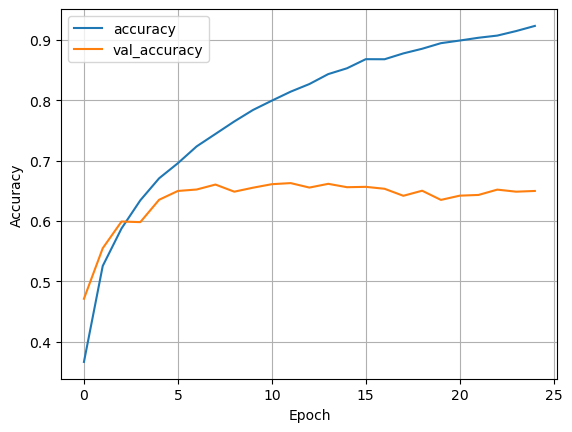

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6382 - loss: 2.0629
Gray Model Accuracy: 0.6381999850273132


In [7]:
plot_loss(history_gray)
plot_accuracy(history_gray)
loss, acc = model_gray.evaluate(x_test_gray, y_test)
print("Gray Model Accuracy:", acc)


### RGB Model Setup

In [ ]:
model_rgb = models.Sequential([
    # Block 1
    layers.Conv2D(16, (3, 3), activation="relu", padding="valid",
                  input_shape=(32, 32, 3)),
    layers.Conv2D(16, (3, 3), activation="relu", padding="valid"),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(32, (3, 3), activation="relu", padding="valid"),
    layers.Conv2D(1, (3, 3), activation="relu", padding="valid"),
    layers.MaxPooling2D((2, 2)),

    # Dense
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_rgb.summary()


e:\Apps_and_Programs\anaconda\envs\CNN_TF_GPU\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,802 (499.23 KB)

 Trainable params: 127,802 (499.23 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_rgb.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history_rgb = model_rgb.fit(
    x_train_rgb, y_train,
    batch_size=64,
    epochs=25,
    validation_split=0.1,
    shuffle=True
)


Epoch 1/25


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_4" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 32, 32, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

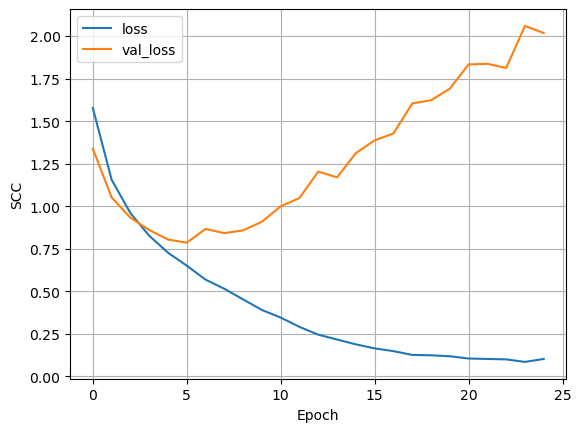

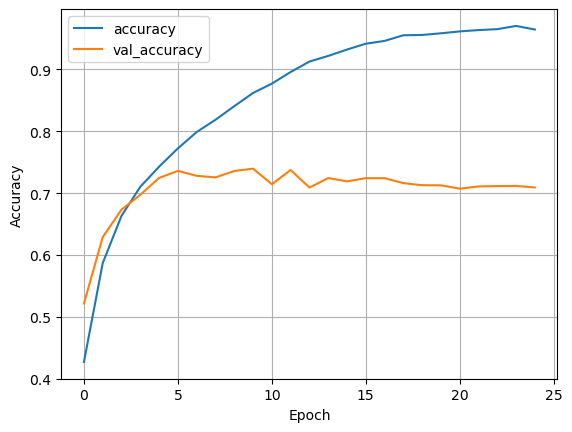

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6982 - loss: 2.0622
RGB Model Accuracy: 0.698199987411499


In [ ]:
plot_loss(history_rgb)
plot_accuracy(history_rgb)
loss, acc = model_rgb.evaluate(x_test_rgb, y_test)
print("RGB Model Accuracy:", acc)


## Reports Section

### Gray Model

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_gray.predict(x_test_gray)
print(classification_report(y_test, y_pred.argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1000
           1       0.79      0.78      0.78      1000
           2       0.51      0.53      0.52      1000
           3       0.43      0.44      0.43      1000
           4       0.62      0.54      0.58      1000
           5       0.56      0.55      0.55      1000
           6       0.62      0.72      0.67      1000
           7       0.71      0.69      0.70      1000
           8       0.71      0.79      0.74      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



### RGB Model

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_rgb.predict(x_test_rgb)
print(classification_report(y_test, y_pred.argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.86      0.79      0.83      1000
           2       0.63      0.54      0.58      1000
           3       0.50      0.56      0.53      1000
           4       0.61      0.73      0.67      1000
           5       0.63      0.52      0.57      1000
           6       0.83      0.69      0.76      1000
           7       0.67      0.79      0.72      1000
           8       0.86      0.77      0.82      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



## Save Model

### Gray

In [ ]:
model_gray.save("model_gray.keras")
model_gray.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 862,640 (3.29 MB)

 Trainable params: 287,546 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 575,094 (2.19 MB)

RGB

In [ ]:
model_rgb.save("model_rgb.keras")
model_rgb.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 863,504 (3.29 MB)

 Trainable params: 287,834 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 575,670 (2.20 MB)